Você pode adquirir versões impressas e de e-book do *Think Python 3e* (em inglês) em
[Bookshop.org](https://bookshop.org/a/98697/9781098155438) e
[Amazon](https://www.amazon.com/_/dp/1098155432?smid=ATVPDKIKX0DER&_encoding=UTF8&tag=oreilly20-20&_encoding=UTF8&tag=greenteapre01-20&linkCode=ur2&linkId=e2a529f94920295d27ec8a06e757dc7c&camp=1789&creative=9325).

Uma versão em língua portuguesa da 3ª edição foi publicada pela editora [Novatec](https://novatec.com.br/livros/pense-em-python-3ed/).

In [ ]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://github.com/AllenDowney/ThinkPython/raw/v3/thinkpython.py');
download('https://github.com/AllenDowney/ThinkPython/raw/v3/diagram.py');
download('https://github.com/ramalho/jupyturtle/releases/download/2024-03/jupyturtle.py');

import thinkpython

# Condicionais e Recursão

O tópico principal deste capítulo é a instrução `if`, que executa códigos diferentes dependendo do estado do programa.
E com a instrução `if`, poderemos explorar uma das ideias mais poderosas da computação, a **recursão**.

Mas começaremos com três novos recursos: o operador de módulo, expressões booleanas e operadores lógicos.

## Divisão inteira e módulo

Lembre-se de que o operador de divisão inteira, `//`, divide dois números e arredonda o resultado para baixo para um inteiro.
Por exemplo, suponha que o tempo de execução de um filme seja de 105 minutos.
Você pode querer saber quanto tempo o filme dura em horas.
A divisão convencional retorna um número de ponto flutuante:

In [ ]:
minutes = 105
minutes / 60

1.75

Mas normalmente não escrevemos horas com pontos decimais.
A divisão inteira retorna o número inteiro de horas, arredondando para baixo:

In [ ]:
minutes = 105
hours = minutes // 60
hours

1

Para obter o resto da divisão, você pode subtrair uma hora em minutos:

In [ ]:
remainder = minutes - hours * 60
remainder

45

Ou você pode usar o **operador de módulo**, `%`, que divide dois números e devolve o resto da divisão inteira:

In [ ]:
remainder = minutes % 60
remainder

45

O operador de módulo é mais útil do que parece.
Por exemplo, ele pode verificar se um número é divisível por outro -- se `x % y` for zero, então `x` é divisível por `y`.

Além disso, ele pode extrair o dígito ou dígitos mais à direita de um número.
Por exemplo, `x % 10` produz o dígito mais à direita de `x` (na base 10).
Da mesma forma, `x % 100` produz os dois últimos dígitos:

In [ ]:
x = 123
x % 10

3

In [ ]:
x % 100

23

Finalmente, o operador de módulo pode fazer "aritmética de relógio".
Por exemplo, se um evento começa às 11 h da manhã e dura três horas, podemos usar o operador de módulo para descobrir a que horas ele termina:

In [ ]:
start = 11
duration = 3
end = (start + duration) % 12
end

2

O evento terminaria às 2 h da tarde.

## Expressões Booleanas

Uma **expressão booleana** é uma expressão que é verdadeira ou falsa.
Por exemplo, as expressões a seguir usam o operador igual, `==`, que compara dois valores e produz `True` se eles forem iguais e `False` caso contrário:

In [ ]:
5 == 5

True

In [ ]:
5 == 7

False

Um erro comum é usar um único sinal de igual (`=`) em vez de um sinal de igual duplo (`==`).
Lembre-se de que `=` atribui um valor a uma variável e `==` compara dois valores:

In [ ]:
x = 5
y = 7

In [ ]:
x == y

False

`True` e `False` são valores especiais que pertencem ao tipo `bool`;
eles não são strings:

In [ ]:
type(True)

bool

In [ ]:
type(False)

bool

O operador `==` é um dos **operadores relacionais**; os outros são:

In [ ]:
x != y               # x não é igual a y

True

In [ ]:
x > y                # x é maior que y

False

In [ ]:
x < y               # x é menor que y

True

In [ ]:
x >= y               # x é maior ou igual a y

False

In [ ]:
x <= y               # x é menor ou igual a y

True

## Operadores lógicos

Para combinar valores booleanos em expressões, podemos usar **operadores lógicos**.
Os mais comuns são `and`, ` or` e `not`.
O significado desses operadores é semelhante ao seu significado em inglês.
Por exemplo, o valor da seguinte expressão é `True` somente se `x` for maior que `0` *e* menor que `10`:

In [ ]:
x > 0 and x < 10

True

A expressão a seguir é `True` se *uma ou ambas* as condições forem verdadeiras, ou seja, se o número for divisível por 2 *ou* 3:

In [ ]:
x % 2 == 0 or x % 3 == 0

False

Por fim, o operador `not` nega uma expressão booleana, então a expressão a seguir é `True` se `x > y` for `False`:

In [ ]:
not x > y

True

A rigor, os operandos de um operador lógico devem ser expressões booleanas, mas Python não é muito rigoroso.
Qualquer número diferente de zero é interpretado como `True`:

In [ ]:
42 and True

True

Essa flexibilidade pode ser útil, mas há algumas sutilezas que podem ser confusas.
Você pode querer evitar essa prática.

## Instruções if

Para escrever programas úteis, quase sempre precisamos da capacidade de
verificar condições e alterar o comportamento do programa de acordo.
**Instruções condicionais** nos dão essa capacidade. A forma mais simples é
a instrução `if`:

In [ ]:
if x > 0:
    print('x is positive')

x is positive


`if` é uma palavra-chave do Python.
As instruções `if` têm a mesma estrutura que as definições de função: um
cabeçalho seguido por uma instrução recuada ou sequência de instruções chamada de **bloco**.

A expressão booleana após `if` é chamada de **condição**.
Se for verdadeira, as instruções no bloco recuado são executadas. Se não, elas não são executadas.

Não há limite para o número de instruções que podem aparecer no bloco, mas tem que haver pelo menos uma.
Ocasionalmente, é útil ter um bloco que não faz nada -- geralmente como um marcador de lugar para o código que você ainda não escreveu.
Nesse caso, você pode usar a instrução `pass`, que não faz nada:

In [ ]:
if x < 0:
    pass          # PENDÊNCIA: precisa lidar com valores negativos!

A palavra `PENDÊNCIA` em um comentário é um lembrete convencional de que há algo que você precisa fazer mais tarde.

NOTA DO TRADUTOR: em inglês é convencional usar a palavra `TODO` (*to do*).

## A cláusula `else`

Uma instrução `if` pode ter uma segunda parte, chamada cláusula `else`.
A sintaxe é assim:

In [ ]:
if x % 2 == 0:
    print('x is even')
else:
    print('x is odd')

x is odd


Se a condição for verdadeira, a primeira instrução recuada é executada; caso contrário, a segunda instrução recuada é executada.

Neste exemplo, se `x` for par, o resto quando `x` for dividido por `2` é `0`, então a condição é verdadeira e o programa exibe `x is even`.
Se `x` for ímpar, o resto é `1`, então a condição é falsa, e o programa exibe `x is odd`.

Como a condição deve ser verdadeira ou falsa, exatamente uma das alternativas será executada.
As alternativas são chamadas de **ramificações**.

## Condicionais encadeadas

Às vezes, há mais de duas possibilidades e precisamos de mais de dois ramos.
Uma maneira de expressar uma computação como essa é uma **condicional encadeada**, que inclui uma cláusula `elif`:

In [ ]:
if x < y:
    print('x is less than y')
elif x > y:
    print('x is greater than y')
else:
    print('x and y are equal')

x is less than y


`elif` é uma abreviação de "else if".
Não há limite para o número de cláusulas `elif`.
Se houver uma cláusula `else`, ela deve estar no final, mas não precisa haver
uma.

Cada condição é verificada em ordem.
Se a primeira for falsa, a próxima é verificada, e assim por diante.
Se uma delas for verdadeira, a ramificação correspondente é executada e a instrução `if` termina.
Mesmo se mais de uma condição for verdadeira, apenas a primeira ramificação verdadeira é executada.

## Condicionais aninhadas

Uma condicional também pode ser aninhada dentro de outra.
Poderíamos ter escrito o exemplo na seção anterior assim:

In [ ]:
if x == y:
    print('x and y are equal')
else:
    if x < y:
        print('x is less than y')
    else:
        print('x is greater than y')

x is less than y


A instrução `if` externa contém duas ramificações.
A primeira ramificação contém uma instrução simples. A segunda ramificação contém outra instrução `if`, que tem duas ramificações próprias.
Essas duas ramificações são ambas instruções simples, embora também pudessem ser instruções condicionais.

Embora o recuo das instruções torne a estrutura aparente, **condicionais aninhadas** podem ser difíceis de ler.
Eu sugiro que você as evite quando puder.

Operadores lógicos geralmente fornecem uma maneira de simplificar instruções condicionais aninhadas.
Aqui está um exemplo com uma condicional aninhada.

In [ ]:
if 0 < x:
    if x < 10:
        print('x is a positive single-digit number.')

x is a positive single-digit number.


A instrução `print` é executada somente se passarmos por ambas as condicionais, então obtemos o mesmo efeito com o operador `and`:

In [ ]:
if 0 < x and x < 10:
    print('x is a positive single-digit number.')

x is a positive single-digit number.


Para esse tipo de condição, o Python fornece uma opção mais concisa:

In [ ]:
if 0 < x < 10:
    print('x is a positive single-digit number.')

x is a positive single-digit number.


## Recursão

É legal para uma função chamar a si mesma.
Pode não ser óbvio por que isso é uma coisa boa, mas acaba sendo uma das coisas mais mágicas que um programa pode fazer.
Aqui está um exemplo:

In [ ]:
def countdown(n):
    if n <= 0:
        print('Blastoff!')
    else:
        print(n)
        countdown(n-1)

Se `n` for 0 ou negativo, `countdown` exibe a frase, "Blastoff!". Caso contrário, ele exibe o valor de `n` e então chama a si mesma, passando `n-1` como argumento.

Aqui está o que acontece quando chamamos esta função com o argumento `3`:

In [ ]:
countdown(3)

3
2
1
Blastoff!


A execução de `countdown` começa com `n=3`, e como `n` é maior
que `0`, ela exibe `3`, e então chama a si mesma\...

> A execução de `countdown` começa com `n=2`, e como `n` é
> maior que `0`, ela exibe `2`, e então chama a si mesma\...
>
> > A execução de `countdown` começa com `n=1`, e como `n` é
> > maior que `0`, ela exibe `1`, e então chama a si mesma\...
> >
> > > A execução de `countdown` começa com `n=0`, e como `n` não é
> > > maior que `0`, ela exibe "Blastoff!" e encerra.
> >
> > O `countdown` que obteve `n=1` encerra.
>
> O `countdown` que obteve `n=2` encerra.

O `countdown` que obteve `n=3` encerra.

Uma função que chama a si mesma é **recursiva**.
Como outro exemplo, podemos escrever uma função que imprime uma string `n` vezes:

In [ ]:
def print_n_times(string, n):
    if n > 0:
        print(string)
        print_n_times(string, n-1)

Se `n` for positivo, `print_n_times` exibe o valor de `string` e então chama a si mesma, passando `string` e `n-1` como argumentos.

Se `n` for `0` ou negativo, a condição é falsa e `print_n_times` não faz nada.

Veja como funciona:

In [ ]:
print_n_times('Spam ', 4)

Spam 
Spam 
Spam 
Spam 


Para exemplos simples como este, provavelmente é mais fácil usar um laço `for`. Mas veremos exemplos mais tarde que são difíceis de escrever com um laço `for` e fáceis de escrever com recursão, então é bom começar cedo.

## Diagramas de pilha para funções recursivas

Aqui está um diagrama de pilha que mostra os quadros criados quando chamamos `countdown` com `n = 3`:

In [ ]:
from diagram import make_frame, Stack

frames = []
for n in [3,2,1,0]:
    d = dict(n=n)
    frame = make_frame(d, name='countdown', dy=-0.3, loc='left')
    frames.append(frame)

stack = Stack(frames, dy=-0.5)

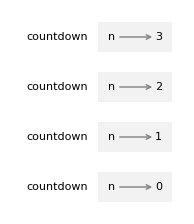

In [ ]:
from diagram import diagram, adjust


width, height, x, y = [1.74, 2.04, 1.05, 1.77]
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)
# adjust(x, y, bbox)

Os quatro quadros `countdown` têm valores diferentes para o parâmetro `n`.
A parte inferior da pilha, onde `n=0`, é chamada de **caso base**.
Ela não faz uma chamada recursiva, então não há mais frames.

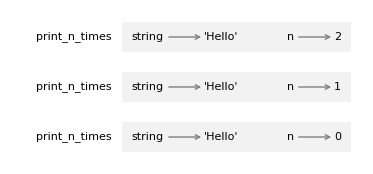

In [ ]:
from diagram import make_frame, Stack
from diagram import diagram, adjust

frames = []
for n in [2,1,0]:
    d = dict(string='Hello', n=n)
    frame = make_frame(d, name='print_n_times', dx=1.3, loc='left')
    frames.append(frame)

stack = Stack(frames, dy=-0.5)

width, height, x, y = [3.53, 1.54, 1.54, 1.27]
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)
# adjust(x, y, bbox)

## Recursão infinita

Se uma recursão nunca atinge um caso base, ela continua fazendo chamadas
recursivas para sempre, e o programa nunca termina. Isso é conhecido como
**recursão infinita**, e geralmente não é uma boa ideia.
Aqui está uma função mínima com uma recursão infinita:

In [ ]:
def recurse():
    recurse()

Toda vez que `recurse` é chamada, ela chama a si mesmo, o que cria outro quadro.
Em Python, há um limite para o número de quadros que podem estar na pilha ao mesmo tempo.
Se um programa excede o limite, ele causa um erro de tempo de execução:

In [ ]:
%xmode Context

Exception reporting mode: Context


In [ ]:
%%expect RecursionError

recurse()

RecursionError: maximum recursion depth exceeded

O rastreamento indica que havia quase 3000 quadros na pilha quando o erro ocorreu.

Se você encontrar uma recursão infinita por acidente, revise sua função para confirmar que há um caso base que não faz uma chamada recursiva. E se houver um caso base, verifique se você tem garantia de alcançá-lo.

## Entrada pelo teclado

Os programas que escrevemos até agora não aceitam nenhuma entrada do usuário. Eles apenas fazem a mesma coisa todas as vezes.

O Python fornece uma função interna chamada `input` que para o programa e espera que o usuário digite algo. Quando o usuário pressiona *Return* ou *Enter*, o programa continua e `input` devolve o que o usuário
digitou como uma string:

In [ ]:
# Solução

# Esta célula substitui a função inpu para que o notebook funcione sem pausas
def input():
     return

In [ ]:
text = input()

Antes de obter a entrada do usuário, você pode querer exibir um mensagem
dizendo ao usuário o que digitar. `input` pode receber uma mensagem como argumento:

In [1]:
# Solução

# Esta célula substitui a função inpu para que o notebook funcione sem pausas
def input(prompt):
    print(prompt, end='')
    reply = 'It is Arthur, King of the Britons'
    print(reply)
    return reply

In [ ]:
name = input('What...is your name?\n')
name

What...is your name?
It is Arthur, King of the Britons


'It is Arthur, King of the Britons'

A sequência `\n` no final da mensagem representa uma **nova linha**, que é um caractere especial que causa uma quebra de linha -- dessa forma a entrada do usuário aparece abaixo do prompt.

Se você espera que o usuário digite um inteiro, você pode usar a função `int` para converter o valor devolvido para `int`:

In [ ]:
# Solução

# Esta célula substitui a função inpu para que o notebook funcione sem pausas
def input(prompt):
    print(prompt, end='')
    reply = 'What do you mean: an African or European swallow?'
    print(reply)
    return reply

In [ ]:
prompt = 'What...is the airspeed velocity of an unladen swallow?\n'
speed = input(prompt)
speed

What...is the airspeed velocity of an unladen swallow?
What do you mean: an African or European swallow?


'What do you mean: an African or European swallow?'

Mas se eles digitarem algo que não seja um inteiro, você receberá um erro de tempo de execução:

In [ ]:
%xmode Minimal

Exception reporting mode: Minimal


In [ ]:
%%expect ValueError

int(speed)

ValueError: invalid literal for int() with base 10: 'What do you mean: an African or European swallow?'

Veremos como lidar com esse tipo de erro mais tarde.

## Depuração

Quando ocorre um erro de sintaxe ou de tempo de execução, a mensagem de erro contém muitas informações, mas pode ser carregada demais. As partes mais úteis são geralmente:

- Que tipo de erro foi; e

- Onde ocorreu.

Erros de sintaxe geralmente são fáceis de encontrar, mas há algumas pegadinhas.
Erros relacionados a espaços e tabulações podem ser complicados porque são invisíveis e estamos acostumados a ignorá-los:

In [ ]:
%%expect IndentationError
x = 5
 y = 6

IndentationError: unexpected indent (2365500740.py, line 2)

Neste exemplo, o problema é que a segunda linha está recuada por um espaço.
Mas a mensagem de erro aponta para `y`, o que é enganoso.
As mensagens de erro indicam onde o problema foi descoberto, mas o erro real pode estar antes no código.

O mesmo vale para erros de tempo de execução.
Por exemplo, suponha que você esteja tentando converter uma razão em decibéis, assim:

In [ ]:
%xmode Context

Exception reporting mode: Context


In [ ]:
%%expect ValueError
import math
numerator = 9
denominator = 10
ratio = numerator // denominator
decibels = 10 * math.log10(ratio)

ValueError: math domain error

A mensagem de erro indica a linha 5, mas não há nada de errado com essa linha.
O problema está na linha 4, que usa divisão inteira em vez de divisão de ponto flutuante -- como resultado, o valor de `ratio` é `0`.
Quando chamamos `math.log10`, obtemos um `ValueError` com a mensagem `math domain error`, porque `0` não está no "domínio" de argumentos válidos para `math.log10`, porque o logaritmo de `0` é indefinido.

Em geral, você deve reservar um tempo para ler as mensagens de erro cuidadosamente, mas não presuma que tudo o que elas dizem está correto.

## Glossário

**recursão** (*recursion*)**:**
O processo de chamar a função que está sendo executada no momento.

**operador de módulo** (*modulus operator*)**:**
Um operador, `%`, que funciona em números inteiros e devolve o resto quando um número é dividido por outro.

**expressão booleana** (*boolean expression*)**:**
Uma expressão cujo valor é `True` ou `False`.

**operador relacional** (*relational operator*)**:**
Um dos operadores que compara seus operandos: `==`, `!=`, `>`, `<`, `>=` e `<=`.

**operador lógico** (*logical operator*)**:**
Um dos operadores que combina expressões booleanas, incluindo `and`, `or` e `not`.

**instrução condicional** (*conditional statement*)**:**
Uma instrução que controla o fluxo de execução dependendo de alguma condição.

**condição** (*condition*)**:**
A expressão booleana em uma instrução condicional que determina qual ramificação é executada.

**bloco** (*block*)**:**
Uma ou mais instruções recuadas para indicar que são parte de outra instrução.

**ramificação** (*branch*)**:**
Uma das sequências alternativas de instruções em uma instrução condicional.

**condicional encadeada** (*chained conditional*)**:**
Uma instrução condicional com uma série de ramificações alternativas.

**condicional aninhada** (*nested conditional*)**:**
Uma instrução condicional que aparece em uma das ramificações de outra instrução condicional.

**recursiva** (*recursive*)**:**
Uma função que chama a si mesma é recursiva.

**caso base** (*base case*)**:**
Uma ramificação condicional em uma função recursiva que não faz uma chamada recursiva.

**recursão infinita** (*infinite recursion*)**:**
Uma recursão que não tem um caso base ou nunca o alcança.
Eventualmente, uma recursão infinita causa um erro de tempo de execução.

**nova linha** (*newline*)**:**
Um caractere que cria uma quebra de linha entre duas partes de uma *string*.

## Exercícios

In [ ]:
# Esta célula diz ao Jupyter para fornecer informações detalhadas de depuração
# quando ocorre um erro de tempo de execução. Execute-a antes de trabalhar nos
# exercícios.

%xmode Verbose

Exception reporting mode: Verbose


### Pergunte a um assistente virtual

* Pergunte a um assistente virtual, "Quais são alguns usos do operador de módulo?" ("*What are some uses of the modulus operator?*").

* O Python fornece operadores para calcular as operações lógicas `and`, `or` e `not`, mas não tem um operador que calcule a operação *exclusive*`or` (ou exclusivo), geralmente escrita `xor`. Pergunte a um assistente "Qual é a operação lógica xor e como eu a calculo em Python?" ("*What is the logical xor operation and how do I compute it in Python?*").

Neste capítulo, vimos duas maneiras de escrever uma instrução `if` com três ramificações, usando uma condicional encadeada ou uma condicional aninhada.
Você pode usar um assistente virtual para converter de uma para a outra.
Por exemplo, peça a um assistente virtual, "Converta esta instrução em uma condicional encadeada." ("*Convert this statement to a chained conditional.*").

In [ ]:
x = 5
y = 7

In [ ]:
if x == y:
    print('x and y are equal')
else:
    if x < y:
        print('x is less than y')
    else:
        print('x is greater than y')

x is less than y


Peça a um assistente virtual: "Reescreva esta declaração com uma única condicional". ("*Rewrite this statement with a single conditional."*).

In [ ]:
if 0 < x:
    if x < 10:
        print('x is a positive single-digit number.')

x is a positive single-digit number.


Veja se um assistente virtual consegue simplificar essa complexidade desnecessária:

In [ ]:
if not x <= 0 and not x >= 10:
    print('x is a positive single-digit number.')

x is a positive single-digit number.


Aqui está uma tentativa de uma função recursiva que faz a contagem regressiva de dois em dois:

In [ ]:
def countdown_by_two(n):
    if n == 0:
        print('Blastoff!')
    else:
        print(n)
        countdown_by_two(n-2)

Parece que funciona.

In [ ]:
countdown_by_two(6)

6
4
2
Blastoff!


Mas tem um erro. Pergunte a um assistente virtual o que está errado e como consertar. Cole a solução que ele fornece aqui e teste.

### Exercício

O módulo `time` fornece uma função, também chamada de `time`, que devolve o número de segundos desde a "época Unix", que é 1º de janeiro de 1970, 00:00:00 UTC (Tempo Universal Coordenado):

In [ ]:
from time import time

now = time()
now

1716394001.8466134

Use a divisão inteira e o operador de módulo para calcular o número de dias desde 1º de janeiro de 1970 e a hora atual do dia em horas, minutos e segundos.

Você pode ler mais sobre o módulo `time` em <https://docs.python.org/pt-br/3/library/time.html> (ou em inglês <https://docs.python.org/3/library/time.html>).

In [ ]:
# Solução

seconds_per_day = 24 * 60 * 60
days = now // seconds_per_day
days

19865.0

In [ ]:
# Solução

remainder = now % seconds_per_day

hours = remainder // 3600
hours

16.0

In [ ]:
# Solução

remainder = remainder % 3600

minutes = remainder // 60
minutes

6.0

In [ ]:
# Solução

seconds = remainder % 60
seconds

41.84661340713501

### Exercício

Se você receber três gravetos, você pode ou não ser capaz de organizá-los em um triângulo. Por exemplo, se um dos gravetos tiver 12 polegadas de comprimento e os outros dois tiverem uma polegada de comprimento, você não conseguirá fazer com que os gravetos curtos se encontrem no meio. Para quaisquer três comprimentos, há um teste para ver se é possível formar um triângulo:

> Se qualquer um dos três comprimentos for maior que a soma dos outros dois,
> então você não pode formar um triângulo. Caso contrário, você pode. (Se a
> soma de dois comprimentos for igual ao terceiro, eles formam o que é chamado
> de triângulo "degenerado".)

Escreva uma função chamada `is_triangle` que receba três inteiros como
argumentos e que imprima "Sim" ou "Não", dependendo
se você pode ou não formar um triângulo a partir de gravetos com os comprimentos fornecidos. Dica: use uma condicional encadeada.

In [ ]:
# Solução

def is_triangle(a, b, c):
    if a > b + c:
        print('No')
    elif b > a + c:
        print('No')
    elif c > a + b:
        print('No')
    else:
        print('Yes')

Teste sua função com os seguintes casos:

In [ ]:
is_triangle(4, 5, 6)   # deveria ser Yes

Yes


In [ ]:
is_triangle(1, 2, 3)   # deveria ser Yes

Yes


In [ ]:
is_triangle(6, 2, 3)   # deveria ser No

No


In [ ]:
is_triangle(1, 1, 12)  # deveria ser No

No


### Exercício

Qual é a saída do programa a seguir? Desenhe um diagrama de pilha que
mostre o estado do programa quando ele imprime o resultado.

In [ ]:
def recurse(n, s):
    if n == 0:
        print(s)
    else:
        recurse(n-1, n+s)

recurse(3, 0)

6


In [2]:
# Solução

"""Soma os números de 1 a `n`

n: inteiro
s: a soma dos números até agora
"""

'Soma os números de 1 a `n`\n\nn: inteiro\ns: a soma dos números até agora\n'

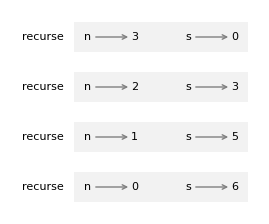

In [ ]:
# Solução

from diagram import make_frame, Stack
from diagram import diagram, adjust

frames = []
for n in [3,2,1,0]:
    d = dict(n=n, s=6-sum(range(n+1)))
    frame = make_frame(d, name='recurse', dx=1.0, loc='left')
    frames.append(frame)

stack = Stack(frames, dy=-0.5)

width, height, x, y = [2.49, 2.04, 0.81, 1.77]
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)
# adjust(x, y, bbox)

### Exercício

Os exercícios a seguir usam o módulo `jupyturtle`, descrito no Capítulo 4.

Leia a função a seguir e veja se consegue descobrir o que ela faz.
Em seguida, execute-a e veja se acertou.
Ajuste os valores de `length`, `angle` e `factor` e veja qual efeito eles têm no resultado.
Se não tiver certeza de que entendeu como funciona, tente perguntar a um assistente virtual.

In [ ]:
from jupyturtle import forward, left, right, back

def draw(length):
    angle = 50
    factor = 0.6

    if length > 5:
        forward(length)
        left(angle)
        draw(factor * length)
        right(2 * angle)
        draw(factor * length)
        left(angle)
        back(length)

In [ ]:
# Solução

from jupyturtle import make_turtle

make_turtle(delay=0)
draw(50)

### Exercício

Pergunte a um assistente virtual "O que é a curva de Koch?" ("*What is the Koch curve?*")

Para desenhar uma curva de Koch com comprimento `x`, tudo o que você
precisa fazer é

1. Desenhe uma curva de Koch com comprimento `x/3`.

2. Vire à esquerda 60 graus.

3. Desenhe uma curva de Koch com comprimento `x/3`.

4. Vire à direita 120 graus.

5. Desenhe uma curva de Koch com comprimento `x/3`.

6. Vire à esquerda 60 graus.

7. Desenhe uma curva de Koch com comprimento `x/3`.

A exceção é se `x` for menor que `5` -- nesse caso, você pode simplesmente desenhar uma linha reta com comprimento `x`.

Escreva uma função chamada `koch` que recebe `x` como argumento e desenha uma curva de Koch com o comprimento fornecido.

In [ ]:
# Solução

def koch(x):
    """Draws a koch curve with length n."""
    if x < 5:
        forward(x)
    else:
        koch(x / 3)
        left(60)
        koch(x / 3)
        right(120)
        koch(x / 3)
        left(60)
        koch(x / 3)

O resultado deve ficar assim:

In [ ]:
make_turtle(delay=0)
koch(120)

Depois que a função koch estiver funcionando, você pode usar esse laço para desenhar três curvas de Koch no formato de um floco de neve:

In [ ]:
make_turtle(delay=0, height=300)
for i in range(3):
    koch(120)
    right(120)

### Exercício

Assistentes virtuais conhecem as funções no módulo `jupyturtle`, mas há muitas versões dessas funções, com nomes diferentes, então um assistente virtual pode não saber de qual você está falando.

Para resolver esse problema, você pode fornecer informações adicionais antes de fazer uma pergunta.
Por exemplo, você pode iniciar um *prompt* com "Aqui está um programa que usa o módulo `jupyturtle`" ("*Here's a program that uses the `jupyturtle` module*") e, em seguida, colar um dos exemplos deste capítulo.
Depois disso, o assistente virtual deve ser capaz de gerar código que usa este módulo.

Por exemplo, peça a um assistente virtual um programa que desenhe um triângulo de Sierpiński.
O código que você obtém deve ser um bom ponto de partida, mas você pode ter que fazer alguma depuração.
Se a primeira tentativa não funcionar, você pode dizer ao assistente virtual o que aconteceu e pedir ajuda -- ou você mesmo pode depurar.

In [ ]:
# Solução

# Aqui está o código que obtive do ChatGPT em junho de 2023, com apenas algumas
# correções

def draw_sierpinski(length, depth):
    if depth == 0:
        for _ in range(3):
            forward(length)
            left(120)
    else:
        draw_sierpinski(length / 2, depth - 1)
        forward(length / 2)
        draw_sierpinski(length / 2, depth - 1)
        back(length / 2)
        left(60)
        forward(length / 2)
        right(60)
        draw_sierpinski(length / 2, depth - 1)
        left(60)
        back(length / 2)
        right(60)

Veja como o resultado pode ser, embora a versão obtida possa ser diferente.

In [ ]:
make_turtle(delay=0, height=200)

draw_sierpinski(100, 3)

[Pense Python: 3ª Edição](https://rodrigocarlson.github.io/PensePython3ed/)

Copyright 2024 [Allen B. Downey](https://allendowney.com/) (versão original)

Copyright 2025 [Rodrigo Castelan Carlson](https://rodrigocarlson.paginas.ufsc.br/) (desta versão)

Foram preservadas as mesmas licenças da versão original.

Licença dos códigos: [MIT License](https://mit-license.org/)

Licença dos textos: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)